In [8]:
import pandas as pd

df = pd.read_csv("/resources/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
import seaborn as sns


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

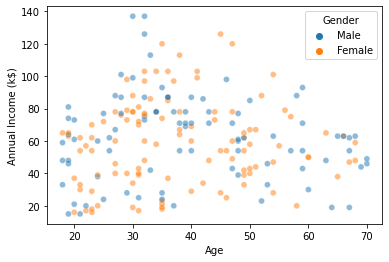

In [11]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)",
               hue="Gender", alpha=0.5)

Bu saçılma grafiği, müşterilerin **yaşları** ile **yıllık gelirlerini** cinsiyete göre gösteriyor gibi görünüyor.   
müşterilerin yaşları ve yıllık gelirleri arasındaki ilişkiyi cinsiyet üzerinden görselleştiriyor. 

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

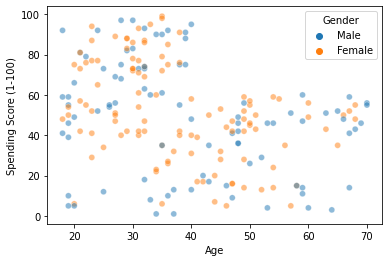

In [15]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)",
               hue="Gender", alpha=0.5)

**yaş** ile **harcama puanları** arasındaki ilişkiyi cinsiyete göre gösteriyor gibi görünüyor.  
Harcama puanları, yaşa göre nasıl dağılıyor, hangi yaş grubundaki müşterilerin daha yüksek veya düşük harcama puanına sahip olduğu gibi konularda fikir verebilir.

In [18]:
X = df[["Age", "Spending Score (1-100)"]]
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [20]:
from sklearn.cluster import KMeans
uzaklik = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42)
    model.fit(X)
    uzaklik.append(model.inertia_)

Bu kod, sklearn kütüphanesindeki KMeans algoritmasını kullanarak farklı küme sayıları için KMeans modeli oluşturuyor.

uzaklik adında bir boş liste oluşturuluyor. Daha sonra range(1, 11) döngüsü ile küme sayısını 1'den 10'a kadar artarak değiştiriyoruz.

Her iterasyonda, belirtilen küme sayısı (n_clusters) ve diğer parametrelerle birlikte (init, n_init, max_iter, tol, random_state) KMeans modeli oluşturuluyor. Bu modeller fit() metodu ile veri setine (X) uyduruluyor. Modelin inertia değeri (model.inertia_) hesaplanıp, bu değer uzaklik listesine ekleniyor. Bu değer, KMeans algoritmasının o küme sayısı için inertia değerini temsil eder.

Sonuç olarak, bu kod farklı küme sayıları için KMeans modeli oluşturup, her bir küme sayısı için inertia değerlerini hesaplayarak bu değerleri uzaklik listesine kaydeder. Bu değerler, küme sayısını belirlemede yardımcı olabilir, optimal küme sayısını belirlemek için inertia değerlerinin grafiği incelenebilir.

Kod farklı küme sayıları için **KMeans algoritmasını** kullanarak her bir küme sayısının **"inertia_"** değerini hesaplar. Bu değer, **veri noktalarının küme merkezine** olan karesel uzaklıklarının toplamını ifade eder. Azalan **inertia değeri**, veri noktalarının kümeler içinde daha yoğun ve merkezlere daha yakın olduğunu gösterir. **"uzaklik"** listesi, farklı küme sayıları için inertia değerlerini içerir ve genellikle en uygun küme sayısını belirlemek için **"dirsek"** yöntemiyle kullanılır. Bu yöntem, veri setinin homojenliğini ve kümeler arasındaki farklılıkları anlamamıza yardımcı olur.

İnertia, KMeans algoritması tarafından belirlenen küme merkezlerinin, her veri noktasının merkeze olan uzaklıklarının karelerinin toplamını ifade eder. Bu, her bir veri noktasının kendi küme merkezine olan uzaklığının ölçüsüdür ve bu uzaklıkların kareleri toplamıdır. Uzaklık ise genel olarak bir noktanın diğer bir noktaya olan mesafesini belirtir. İnertia, KMeans algoritmasının kümeleme performansını değerlendirmek için kullanılırken, uzaklık genellikle iki nokta arasındaki mesafeyi belirtmek için kullanılır. Kısacası, inertia, küme merkezlerine olan toplam uzaklık miktarını temsil ederken, uzaklık ise genellikle iki nokta arasındaki mesafeyi belirtir.

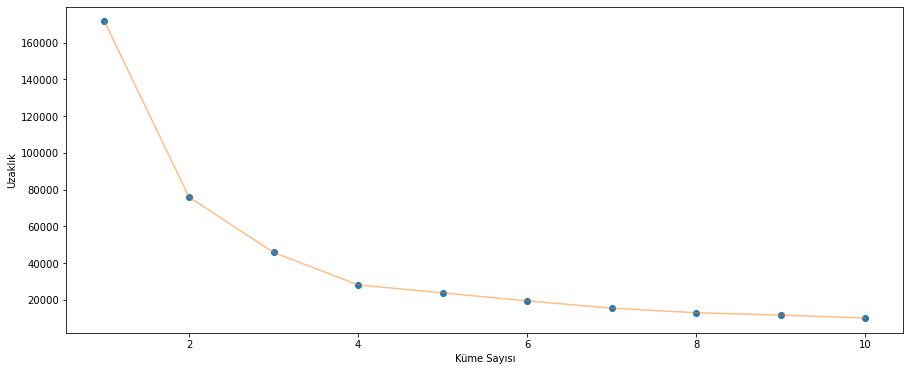

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , uzaklik , 'o')
plt.plot(np.arange(1 , 11) , uzaklik , '-' , alpha = 0.5)
plt.xlabel('Küme Sayısı') , plt.ylabel('Uzaklık')
plt.show()

Bu kod, küme sayısının artışıyla inertia değerlerinin nasıl değiştiğini görselleştirmek için kullanılır.

matplotlib kütüphanesi kullanılarak bir grafik oluşturuluyor. figure() fonksiyonu bir figür oluşturur ve figsize parametresiyle figürün boyutları belirlenir.

plt.plot() fonksiyonu, küme sayısının değişimi ile inertia değerlerinin nasıl değiştiğini göstermek için kullanılır. np.arange(1, 11) ile x-ekseni (küme sayısı) değerleri belirlenirken, uzaklik listesindeki inertia değerleri y-ekseni (uzaklık) olarak atanır. 'o' parametresiyle nokta grafikleri, '-' parametresiyle ise çizgi grafiği çizilir. alpha=0.5 ise çizgilerin saydamlığını ayarlar.

plt.xlabel() ve plt.ylabel() ile x ve y eksenlerine etiketler atanır.

Son olarak, plt.show() ile grafiğin görüntülenmesi sağlanır.

Bu grafik, küme sayısının artışıyla inertia değerlerinin nasıl değiştiğini göstererek, optimal küme sayısını belirlemede yardımcı olabilir. Genellikle "dirsek yöntemi" olarak adlandırılan yaklaşım, grafikte dirsek şeklinde bir kırılma noktasının olduğu yerin optimal küme sayısı olabileceğini gösterir. 

In [36]:
model = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 , algorithm='elkan') 
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_

    n_clusters = 4: Oluşturulacak küme sayısıdır. Burada 4 küme belirlenmiştir.
    
    init='k-means++': Başlangıç merkezlerinin 'k-means++' yöntemiyle belirlenmesini sağlar. Bu yöntem, daha iyi başlangıç merkezi konumları elde etmeye çalışır.
    
    n_init = 10: Rastgele başlangıç merkezleri seçimi için tekrar sayısıdır. Bu durumda, 10 farklı rastgele başlangıç seçimi yapılır ve en iyi sonuçları veren başlangıçlar seçilir.
    
    max_iter=300: Her bir tekrar için maksimum iterasyon sayısıdır. Algoritma, maksimum iterasyon sayısına ulaşana veya kümeleme konverge edene kadar çalışır.
    
    tol=0.0001: Kümelerin değişim miktarı (tolerans) bu değerin altına düştüğünde algoritmanın sonlanmasını sağlar.
    
    random_state= 42: Rastgele sayı üretimi için seed değeridir. Bu sayede algoritmanın tekrar çalıştırılması durumunda aynı sonuçları alabiliriz.
    
    algorithm='elkan': Kullanılacak algoritma türüdür. 'elkan', KMeans algoritmasının hızlandırılmış bir versiyonudur.

model.fit(X): Modelin verilerle eğitilmesini sağlar. Veri seti X ile eğitilir.

new_labels = model.labels_: Her bir veri noktasının, k-means algoritması tarafından atanan etiketlerini içeren labels_ özelliği kullanılarak yeni etiketler oluşturulur.

merkezler = model.cluster_centers_: Küme merkezlerini içeren cluster_centers_ özelliği kullanılarak, her kümenin merkezi bulunur.

In [10]:
new_labels

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Bu çıktı, her bir veri noktasının hangi kümeye atandığını gösteren etiketleri içerir. Her bir etiket, o veri noktasının hangi kümeye ait olduğunu belirtir. Örneğin, new_labels dizisinin ilk elemanı 3 ise, ilk veri noktasının 4. kümeye ait olduğunu gösterir. Bu etiketler, KMeans algoritması tarafından belirlenen kümeleri temsil eder. Etiketler, her bir veri noktasını ilgili kümelere atayarak kümeleme işlemini gerçekleştirir.